<center><h2><b>CIC-Darknet2020</b></h2></center>
<center><h2><b>Detection models</b></h2></center>

# Libraries importing and configuration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from darknet.classification import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
random_state = 42
dataset_folder = "dataset/" 
img_folder = "imgs/"

np.random.seed(random_state)
plt.rcParams['figure.figsize'] = (18,6)
plt.rcParams["savefig.format"] = 'pdf'
plt.rcParams["savefig.dpi"] = 600
plt.rcParams.update({'font.size': 20})

In [4]:
samples = pd.read_csv(dataset_folder + "darknet_dataset_processed_encoded.csv")
del samples['Label.1']
samples.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign
1,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign
2,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign
3,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign
4,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Benign


# Benign vs Darknet classification

In [5]:
X, y, labels = split_train_target(samples, "Label")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)
columns = samples.columns.tolist()

## Decision tree

100%|██████████| 10/10 [01:33<00:00,  9.30s/it, Test acc. #9=0.999]


       precision       recall       f1-score       support       
Benign:   99.94		99.93		99.93		784910.00		
Darknet:  99.64		99.70		99.67		163010.00		


 10-fold Accuracy: 99.89%
Test accuracy: 99.92%


Confusion matrix:
[[38660    19]
 [   18  7992]]

Benign :    99.95%
Darknet :   99.76%


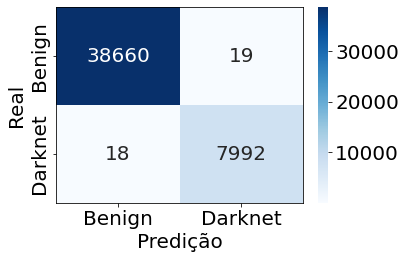

In [6]:
dt = DecisionTreeClassifier()
report_dt = evaluate_model(dt, X_train, y_train, X_test, y_test, 
                           labels, figsize=(6,4),rotation=(90, 0), 
                           fname="imgs/dt_conf_origin")

## Random forest

100%|██████████| 10/10 [04:35<00:00, 27.51s/it, Test acc. #9=0.999]


       precision       recall       f1-score       support       
Benign:   99.89		99.97		99.93		784910.00		
Darknet:  99.88		99.45		99.66		163010.00		


 10-fold Accuracy: 99.88%
Test accuracy: 99.89%


Confusion matrix:
[[38668    11]
 [   39  7971]]

Benign :    99.90%
Darknet :   99.86%


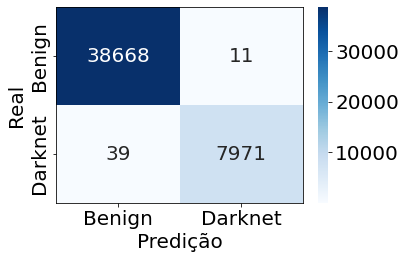

In [7]:
rf = RandomForestClassifier()
report_rf = evaluate_model(rf, X_train, y_train, X_test, y_test, labels, 
                           figsize=(6,4), rotation=(90, 0), fname="imgs/rf_conf_origin")

## Multilayer perceptron

In [8]:
scaler = MinMaxScaler(feature_range = (-1,1)) # StandardScaler
scaler.fit(X)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [9]:
mlp = MLPClassifier(hidden_layer_sizes=[10, 20, 10], learning_rate="adaptive", early_stopping=True)
report_mlp, accs_mlp = evaluate_model(mlp, scaled_X_train, y_train, scaled_X_test, y_test, labels, vmax=800,
                           rotation=(0,0), fname="imgs/mlp_conf_app", display_labels=["A", "B", "C", "D", "E","F","G","H"], 
                           figsize=(9,6))

100%|██████████| 10/10 [10:04<00:00, 60.48s/it, Test acc. #9=0.999]


       precision       recall       f1-score       support       
Benign:   99.82		99.98		99.90		784910.00		
Darknet:  99.93		99.14		99.53		163010.00		


 10-fold Accuracy: 99.84%
Test accuracy: 99.85%


Confusion matrix:
[[38673     6]
 [   65  7945]]

Benign :    99.83%
Darknet :   99.92%


ValueError: Shape of passed values is (2, 2), indices imply (8, 8)

## Models comparison

In [7]:
!pip install mlxtend

In [10]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from mlxtend.evaluate import *

In [11]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
scores_dt = cross_val_score(dt, X, y, scoring='accuracy', cv=cv, n_jobs=-1, verbose=10)
print("Decision tree mean accuracy: %.3f%% (%.3f)" % (np.mean(scores_dt)*100, np.std(scores_dt)*100))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:  6.9min remaining:   56.8s


Decision tree mean accuracy: 99.905% (0.027)


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  7.6min finished


In [12]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
scores_rf = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, verbose=10)
print("Random forest mean accuracy: %.3f%% (%.3f)" % (np.mean(scores_rf)*100, np.std(scores_rf)*100))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed: 15.9min remaining:  2.2min


Random forest mean accuracy: 99.907% (0.026)


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 16.9min finished


In [13]:
scaler = MinMaxScaler(feature_range = (-1,1)) # StandardScaler
scaler.fit(X)
scaled_X = scaler.transform(X)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
scores_mlp = cross_val_score(mlp, scaled_X, y, scoring='accuracy', cv=cv, n_jobs=-1, verbose=10)
print("Multilayer perceptron mean accuracy: %.3f%% (%.3f)" % (np.mean(scores_mlp)*100, np.std(scores_mlp)*100))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:  4.2min remaining:   34.2s


Multilayer perceptron mean accuracy: 99.837% (0.029)


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.5min finished


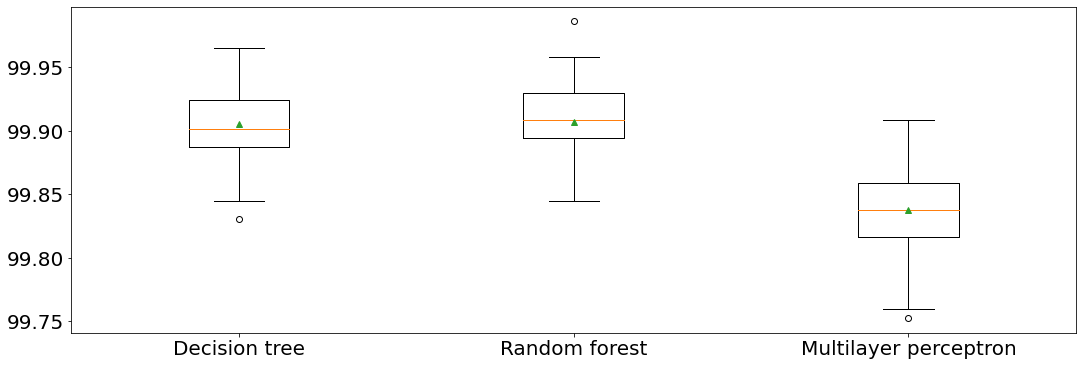

In [19]:
plt.boxplot([scores_dt*100, scores_rf*100, scores_mlp*100], labels=['Decision tree', 'Random forest', "Multilayer perceptron"], showmeans=True)
plt.show()

In [18]:
t, p = paired_ttest_5x2cv(estimator1=dt, estimator2=rf, X=X, y=y)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

t statistic: -2.056
p value: 0.095
Algorithms probably have the same performance


In [20]:
t, p = paired_ttest_5x2cv(estimator1=dt, estimator2=mlp, X=X, y=y)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

t statistic: 1.194
p value: 0.286
Algorithms probably have the same performance


In [17]:
t, p = paired_ttest_5x2cv(estimator1=rf, estimator2=mlp, X=X, y=y)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

t statistic: 0.943
p value: 0.389
Algorithms probably have the same performance
